<img src="NTU.png"
     style="float: left; width: 200px;"/>

# CZ1015 Introduction to Data Science and Artifical Intelligence Mini Project
## World Happiness Report 
A program coded in Python that analysis World Happiness using the World Happiness Report produced by United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation. It contains analysis of happiness of different countries with respect to various factors and a Singapore specific analysis as well. 

Made by **GUPTA JAY, NGUYEN DUY KHANH, TIEU PHAT DAT**  
CZ1015 Introduction to Data Science and Artifical Intelligence  
School of Computer Science and Engineering  
Nanyang Technological University  

### Prerequisites
What things you need to run the program

* CZ1015 Mini Project.ipnyb
* Pandas, Seaborn, Numpy and Matplotlib python libraries
* data.xls

# [Problem Statement] 10% 

# [Exploratory data analysis / visualization to understand the data] 10%

# Economic Analysis of Singapore
# [Preparing the dataset to suit your specific problem definition] 10%
#### Importing and Cleaning the Dataset

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

data = pd.read_excel('data.xls', sheet_name = 'Table2.1')

clean_data = data.copy()

# Rename "#" to "ID" of Pokemon
clean_data.rename(columns = {'Country name': 'Country'}, inplace = True)

# Convert all Variable Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()

# Remove all spaces and dots from Variable Names
clean_data.columns = clean_data.columns.str.replace(".","")
clean_data.columns = clean_data.columns.str.replace(" ","_")

clean_data.replace(' ', '_', regex=True)

# Print the Variable Information to check
# clean_data.info()

clean_data.sample(n = 10)

clean_data = clean_data.set_index('COUNTRY')

clean_data = clean_data.loc[["Singapore", "United States", "Canada"]]

sg_data = clean_data[['YEAR', 'DEMOCRATIC_QUALITY', 'PERCEPTIONS_OF_CORRUPTION', 'LIFE_LADDER', 'SOCIAL_SUPPORT']]

sg_data.isnull().sum()

sg_data = sg_data[pd.notnull(sg_data['PERCEPTIONS_OF_CORRUPTION'])]

sg_data = sg_data[pd.notnull(sg_data['DEMOCRATIC_QUALITY'])]

sg_data = sg_data[pd.notnull(sg_data['SOCIAL_SUPPORT'])]

## Analysing Democracy in Singapore

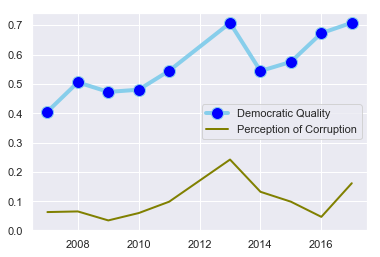

In [4]:
# multiple line plot
plt.plot( 'YEAR', 'DEMOCRATIC_QUALITY', data=sg_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Democratic Quality")
plt.plot( 'YEAR', 'PERCEPTIONS_OF_CORRUPTION', data=sg_data.loc["Singapore"], marker='', color='olive', linewidth=2, label="Perception of Corruption")
plt.legend()

## Observation 1

### Corruption in Singapore is generally perceived as low. However, a few minor scandals led to an sharp dip in Democratic Quality of the Country.

**SCDF and CNB (2012)** - In January 2012, two senior civil servants were arrested under graft charges. Both men were arrested in connection with the Prevention of Corruption Act relating to an IT contract

**NParks (2012)** - In July 2012, National Parks Board's (NParks) purchase of 26 Brompton bikes costing $2,200 each sparked a nationwide uproar after it was revealed by a whistleblower on online forum HardwareZone of possible corruption due numerous red flags in the way the procurement was done.

**CPIB (2013)** - On 23 July 2013, Corrupt Practices Investigation Bureau (CPIB) assistant director Edwin Yeo Seow Hionh was charged with misappropriating at least $1.7 million from the anti-graft agency between 2008 and 2012.

**MFA (2014)** -  On 20 February 2014, former Ministry of Foreign Affairs (MFA) protocol chief Lim Cheng Hoe, 61, was sentenced to 15 months' jail for cheating.

## Observation 2
#### It can be inferred from looking at the data from 2012 till 2014 that as soon as the perception of corruption increased from 2012 to 2013, it immediately led to a sharp decrease in the democratic quality in the subsequent years. 

## Social Support in Singapore

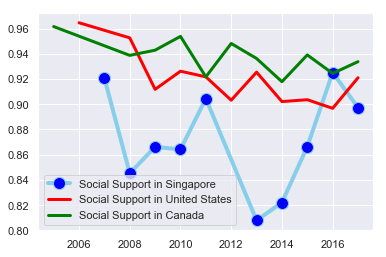

In [5]:
# multiple line plot
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["Singapore"], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Social Support in Singapore")
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["United States"], color='red', linewidth=3, label="Social Support in United States")
plt.plot( 'YEAR', 'SOCIAL_SUPPORT', data=sg_data.loc["Canada"], color='green', linewidth=3, label="Social Support in Canada")
plt.legend()

## Life Satisfaction over the years

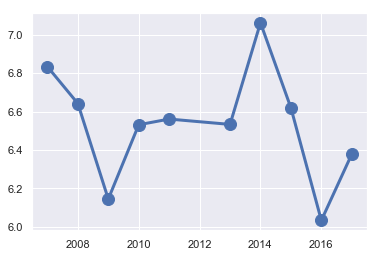

In [12]:
plt.plot('YEAR', 'LIFE_LADDER', data=sg_data.loc['Singapore'], linestyle='-', marker='o', linewidth=3, markersize=12)
plt.show()